# Lab 3 – Task 2: Rotation

Rotation rotates the image around a chosen point (typically the center).

The rotation matrix is:

$$T = \begin{bmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \end{bmatrix}$$

`cv2.getRotationMatrix2D(center, angle, scale)` builds this matrix automatically.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace path with 'lena.png' if available)
image = cv2.imread('pic.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
center = (w // 2, h // 2)
print(f'Image shape: {image.shape}  |  Center: {center}')

Image shape: (360, 360, 3)  |  Center: (180, 180)


## Original Example – Rotate 45°

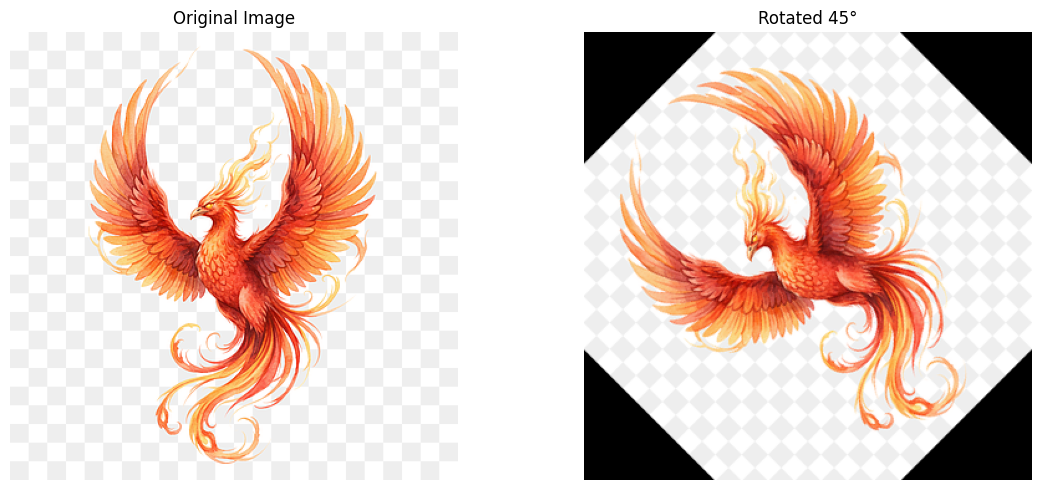

In [2]:
# Original example from the lab
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image, rotation_matrix, (w, h))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
axes[1].set_title('Rotated 45°')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Task 2.1 – Rotate by Different Angles (90°, 180°, 270°)

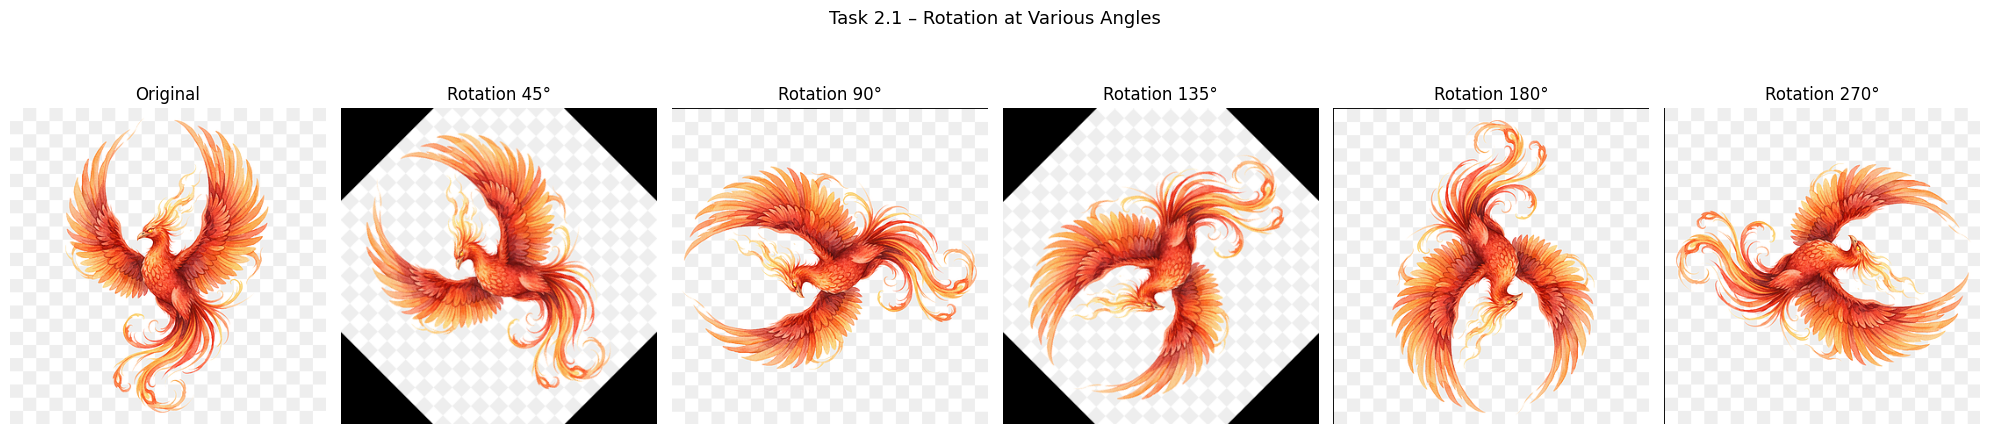

In [3]:
angles = [45, 90, 135, 180, 270]

fig, axes = plt.subplots(1, len(angles) + 1, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, angle in enumerate(angles):
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(f'Rotation {angle}°')
    axes[idx + 1].axis('off')

plt.suptitle('Task 2.1 – Rotation at Various Angles', fontsize=13)
plt.tight_layout()
plt.show()

## Task 2.2 – Rotation with Scaling

The third parameter of `getRotationMatrix2D` is the scale factor. Combining rotation with scaling in a single step is efficient and avoids two separate transformations.

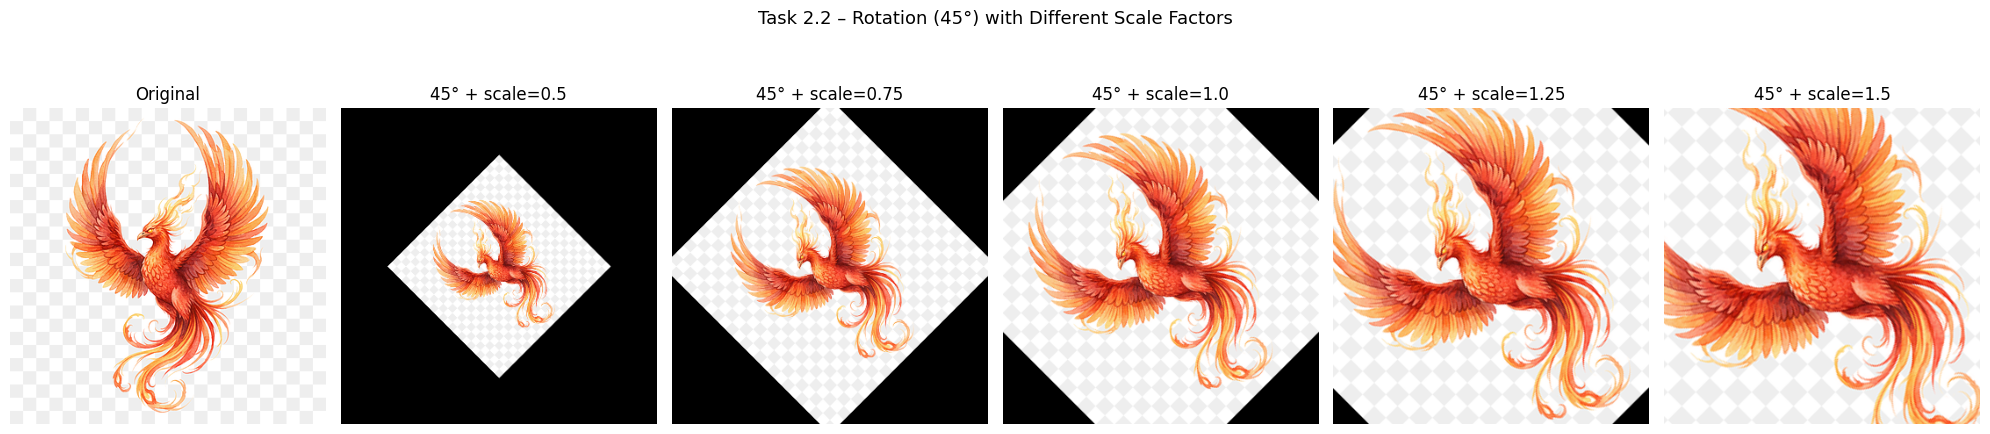

In [4]:
# Rotate 45° but vary the scale factor
scale_factors = [0.5, 0.75, 1.0, 1.25, 1.5]

fig, axes = plt.subplots(1, len(scale_factors) + 1, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, scale in enumerate(scale_factors):
    M = cv2.getRotationMatrix2D(center, 45, scale)
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(f'45° + scale={scale}')
    axes[idx + 1].axis('off')

plt.suptitle('Task 2.2 – Rotation (45°) with Different Scale Factors', fontsize=13)
plt.tight_layout()
plt.show()

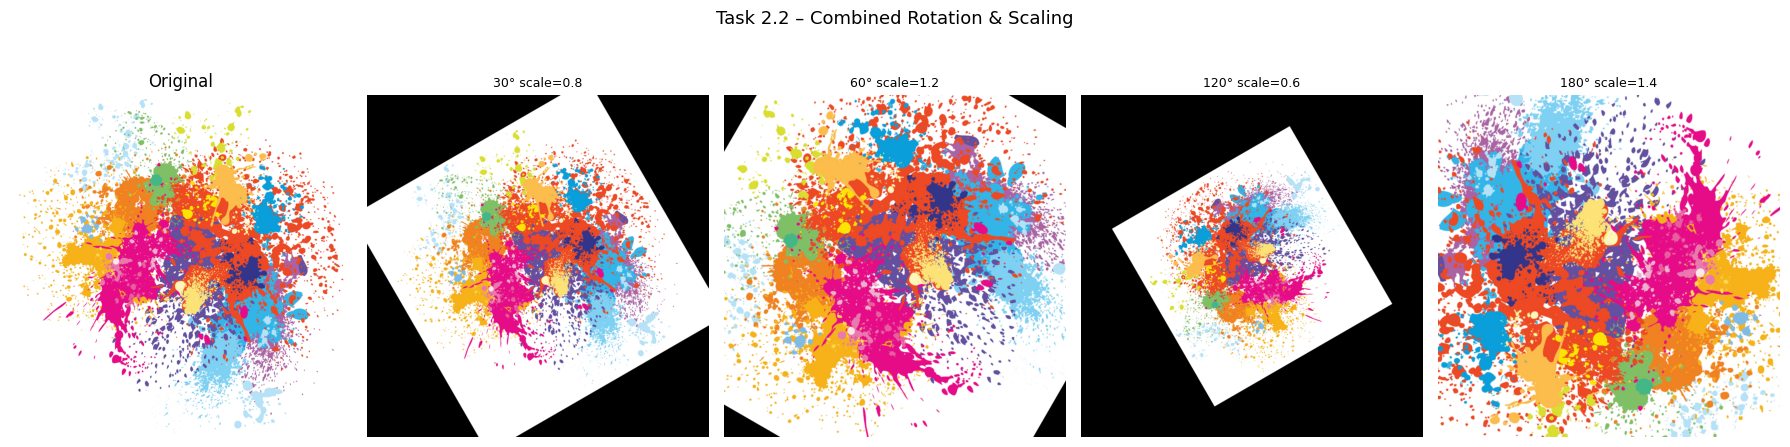

In [5]:
# Also explore different angles combined with scaling
combos = [
    ( 30, 0.8,  '30° scale=0.8'),
    ( 60, 1.2,  '60° scale=1.2'),
    (120, 0.6, '120° scale=0.6'),
    (180, 1.4, '180° scale=1.4'),
]

fig, axes = plt.subplots(1, len(combos) + 1, figsize=(18, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, (angle, scale, title) in enumerate(combos):
    M = cv2.getRotationMatrix2D(center, angle, scale)
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(title, fontsize=9)
    axes[idx + 1].axis('off')

plt.suptitle('Task 2.2 – Combined Rotation & Scaling', fontsize=13)
plt.tight_layout()
plt.show()

## Summary

- A 90° rotation maps `(x, y) → (y, -x)` (relative to center), giving a clean quarter-turn.
- A 180° rotation flips the image both horizontally and vertically simultaneously.
- 270° is equivalent to a 90° counter-clockwise rotation.
- The `scale` parameter in `getRotationMatrix2D` enlarges (`>1`) or shrinks (`<1`) the image during rotation; scale < 1 with rotation keeps the rotated content inside the frame, while scale > 1 causes clipping.
- Black areas appear where no source pixel maps to the output canvas (border fill).